In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
import nolds as ns
import numba
from numba import njit
from numba.typed import List
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from progressbar import ProgressBar
sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto.kuramoto import *
from kuramoto.plotting import *
from kuramoto.plotting_dm import *
from kuramoto.network_dm import *
from kuramoto.kuramoto_com import *
# the above two lines are needed in order to see the modifications in python files without restarting vscode, 2 means that all modules will be reimported

In [392]:
# Parameters

N = 1000 # number of nodes
dt = 0.01 # time step
t_max = 50 # max time of the simulation
n_steps = int(t_max/dt)
coupling1 = 0.2 # coupling between oscillators (will be normalized by the number of interactions or max degree). 0.2 valore max
coupling2 = 0.25
omega_f = 1.0 # frequence of the external field
coupling_ext = [0.0, 0.2, 0.5, 0.7, 1.0, 1.5] # coupling between the oscillators and the external field. 1.7 valore max
sigma = 1 # sigma of the initial distribution of the frequencies (gaussian distribution), the mean is set at 0
t_eq = 300 #equilibration time
delta_t = t_max - t_eq

In [393]:
# Creation of the graph

# graph_nx1 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title1 = 'ER'
# graph_nx2 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title2 = 'ER'

graph_nx1 = nx.barabasi_albert_graph(N, m = 3); title1 = 'BA'
graph_nx2 = nx.barabasi_albert_graph(N, m = 3); title2 = 'BA'
graph1 = nx.to_numpy_array(graph_nx1)
graph2 = nx.to_numpy_array(graph_nx2)

model1_1 = Kuramoto(coupling = coupling1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[0], omega_f = omega_f)
model1_2 = Kuramoto(coupling = coupling1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[1], omega_f = omega_f)
model1_3 = Kuramoto(coupling = coupling1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[2], omega_f = omega_f)
model1_4 = Kuramoto(coupling = coupling1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[3], omega_f = omega_f)
model1_5 = Kuramoto(coupling = coupling1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[4], omega_f = omega_f)
model1_6 = Kuramoto(coupling = coupling1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[5], omega_f = omega_f)

model2_1 = Kuramoto(coupling = coupling2, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[0], omega_f = omega_f)
model2_2 = Kuramoto(coupling = coupling2, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[1], omega_f = omega_f)
model2_3 = Kuramoto(coupling = coupling2, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[2], omega_f = omega_f)
model2_4 = Kuramoto(coupling = coupling2, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[3], omega_f = omega_f)
model2_5 = Kuramoto(coupling = coupling2, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[4], omega_f = omega_f)
model2_6 = Kuramoto(coupling = coupling2, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext[5], omega_f = omega_f)

In [394]:
print(f'Initial parameters \n')
print(f'number of nodes: N1 = {N}, N2 = {N}')
print(f'coupling: c1 = {coupling1}, c2 = {coupling2}')
print(f'external frequency = {omega_f}')
print(f'time step dt = {dt}')
print(f'number of temporal steps {n_steps}')
act_mat1_1 = model1_1.run(adj_mat = graph1).astype('float32')
ord1_1 = [Kuramoto.phase_coherence(vec) for vec in act_mat1_1.T]
print('End of the first run')
act_mat1_2 = model1_2.run(adj_mat = graph1).astype('float32')
ord1_2 = [Kuramoto.phase_coherence(vec) for vec in act_mat1_2.T]
print('End of the second run')
act_mat1_3 = model1_3.run(adj_mat = graph1).astype('float32')
ord1_3 = [Kuramoto.phase_coherence(vec) for vec in act_mat1_3.T]
print('End of the third run')
act_mat1_4 = model1_4.run(adj_mat = graph1).astype('float32')
ord1_4 = [Kuramoto.phase_coherence(vec) for vec in act_mat1_4.T]
act_mat1_5 = model1_5.run(adj_mat = graph1).astype('float32')
ord1_5 = [Kuramoto.phase_coherence(vec) for vec in act_mat1_5.T]
print('End of the fourth run')
act_mat1_6 = model1_6.run(adj_mat = graph1).astype('float32')
ord1_6 = [Kuramoto.phase_coherence(vec) for vec in act_mat1_6.T]
print('End of the First network')

act_mat2_1 = model2_1.run(adj_mat = graph2).astype('float32')
ord2_1 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_1.T]
print('End of the fifth run')
act_mat2_2 = model2_2.run(adj_mat = graph2).astype('float32')
ord2_2 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_2.T]
print('End of the sixth run')
act_mat2_3 = model2_3.run(adj_mat = graph2).astype('float32')
ord2_3 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_3.T]
print('End of the seventh run')
act_mat2_4 = model2_4.run(adj_mat = graph2).astype('float32')
ord2_4 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_4.T]
print('End of the eighth run')
act_mat2_5 = model2_5.run(adj_mat = graph2).astype('float32')
ord2_5 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_5.T]
print('End of the ninth run')
act_mat2_6 = model2_6.run(adj_mat = graph2).astype('float32')
ord2_6 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_6.T]

Initial parameters 

number of nodes: N1 = 1000, N2 = 1000
coupling: c1 = 0.2, c2 = 0.25
external frequency = 1.0
time step dt = 0.01
number of temporal steps 5000
End of the first run
End of the second run
End of the third run
End of the fourth run
End of the First network
End of the fifth run
End of the sixth run
End of the seventh run
End of the eighth run
End of the ninth run


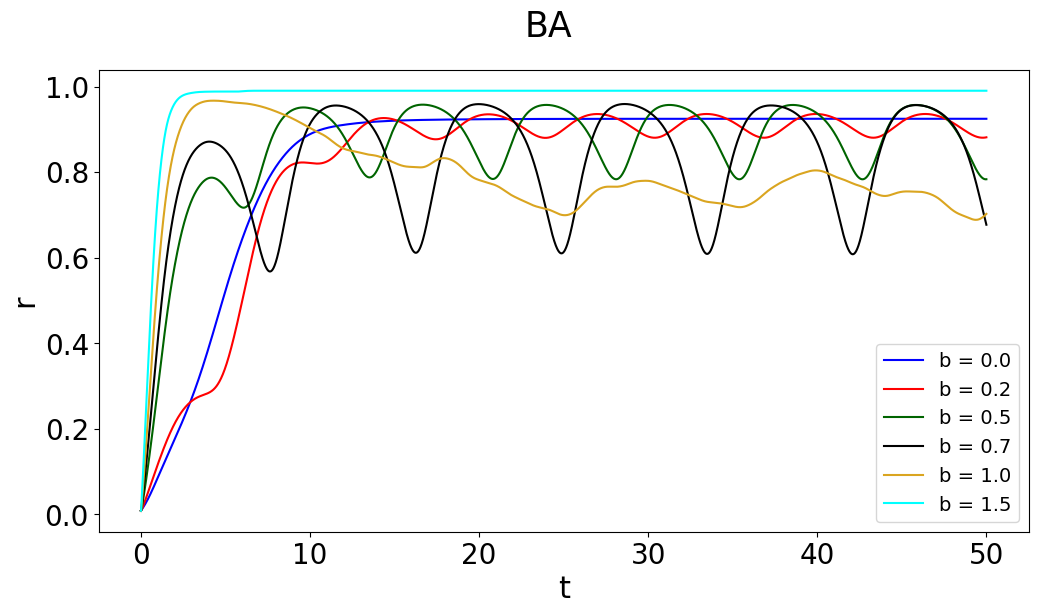

In [395]:
plot_many_r(ord2_1, ord2_2, ord2_3, ord2_4, ord2_5, ord2_6, dt, t_max, title2, 'b', coupling_ext)
#plot_many_r(ord2_1, ord2_2, ord2_5, ord2_6, dt, t_max, title2, 'b', coupling_ext)

In [396]:
final_state1_1 = act_mat1_1[:,-1]
final_state1_2 = act_mat1_2[:,-1]
final_state1_3 = act_mat1_3[:,-1]
final_state1_4 = act_mat1_4[:,-1]
final_state1_5 = act_mat1_5[:,-1]
final_state1_6 = act_mat1_6[:,-1]

final_state2_1 = act_mat2_1[:,-1]
final_state2_2 = act_mat2_2[:,-1]
final_state2_3 = act_mat2_3[:,-1]
final_state2_4 = act_mat2_4[:,-1]
final_state2_5 = act_mat2_5[:,-1]
final_state2_6 = act_mat2_6[:,-1]

H1_1 = H_J_single_simple(coupling1, final_state1_1, graph1, coupling_ext[0], omega_f, t_max)
H2_1 = H_J_single_simple(coupling2, final_state2_1, graph2, coupling_ext[0], omega_f, t_max)
H12_1 = H_J_simple(coupling1, coupling2, final_state1_1, final_state2_1, graph1, graph2, coupling_ext[0], omega_f, t_max)

H1_2 = H_J_single_simple(coupling1, final_state1_2, graph1, coupling_ext[1], omega_f, t_max)
H2_2 = H_J_single_simple(coupling2, final_state2_2, graph2, coupling_ext[1], omega_f, t_max)
H12_2 = H_J_simple(coupling1, coupling2, final_state1_2, final_state2_2, graph1, graph2, coupling_ext[1], omega_f, t_max)

H1_3 = H_J_single_simple(coupling1, final_state1_3, graph1, coupling_ext[2], omega_f, t_max)
H2_3 = H_J_single_simple(coupling2, final_state2_3, graph2, coupling_ext[2], omega_f, t_max)
H12_3 = H_J_simple(coupling1, coupling2, final_state1_3, final_state2_3, graph1, graph2, coupling_ext[2], omega_f, t_max)

H1_4 = H_J_single_simple(coupling1, final_state1_4, graph1, coupling_ext[3], omega_f, t_max)
H2_4 = H_J_single_simple(coupling2, final_state2_4, graph2, coupling_ext[3], omega_f, t_max)
H12_4 = H_J_simple(coupling1, coupling2, final_state1_4, final_state2_4, graph1, graph2, coupling_ext[3], omega_f, t_max)

H1_5 = H_J_single_simple(coupling1, final_state1_3, graph1, coupling_ext[4], omega_f, t_max)
H2_5 = H_J_single_simple(coupling2, final_state2_3, graph2, coupling_ext[4], omega_f, t_max)
H12_5 = H_J_simple(coupling1, coupling2, final_state1_3, final_state2_3, graph1, graph2, coupling_ext[4], omega_f, t_max)

H1_6 = H_J_single_simple(coupling1, final_state1_4, graph1, coupling_ext[5], omega_f, t_max)
H2_6 = H_J_single_simple(coupling2, final_state2_4, graph2, coupling_ext[5], omega_f, t_max)
H12_6 = H_J_simple(coupling1, coupling2, final_state1_4, final_state2_4, graph1, graph2, coupling_ext[5], omega_f, t_max)

In [407]:
tau_min = 0.0001
tau_max_s = 100
tau_max_c = 20
tau_points_s = 500
tau_points_c = 200

In [408]:
tau_min1 = tau_min
tau_max_s1 = tau_max_s
tau_points_s1 = tau_points_s
taur_s1 = np.linspace(tau_min1, tau_max_s1, tau_points_s1)

tau_max_c1 = tau_max_c
tau_points_c1 = tau_points_c
taur_c1 = np.linspace(tau_min1, tau_max_c1, tau_points_c1)


S1_1 = []
S2_1 = []
S12_1 = []

C1_1 = []
C2_1 = []
C12_1 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s1):
#     S1_1.append(network_thermodynamics_S(H1_1, tau))
#     S2_1.append(network_thermodynamics_S(H2_1, tau))
#     S12_1.append(network_thermodynamics_S(H12_1, tau))


# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c1):
    C1_1.append(network_thermodynamics_C(H1_1, tau))
    C2_1.append(network_thermodynamics_C(H2_1, tau))
    C12_1.append(network_thermodynamics_C(H12_1, tau))

100% |########################################################################|


In [409]:
tau_min2 = tau_min
tau_max_s2 = tau_max_s
tau_points_s2 = tau_points_s
taur_s2 = np.linspace(tau_min2, tau_max_s2, tau_points_s2)

tau_max_c2 = tau_max_c
tau_points_c2 = tau_points_c
taur_c2 = np.linspace(tau_min2, tau_max_c2, tau_points_c2)


S1_2 = []
S2_2 = []
S12_2 = []

C1_2 = []
C2_2 = []
C12_2 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s2):
#     S1_2.append(network_thermodynamics_S(H1_2, tau))
#     S2_2.append(network_thermodynamics_S(H2_2, tau))
#     S12_2.append(network_thermodynamics_S(H12_2, tau))


# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c2):
    C1_2.append(network_thermodynamics_C(H1_2, tau))
    C2_2.append(network_thermodynamics_C(H2_2, tau))
    C12_2.append(network_thermodynamics_C(H12_2, tau))

100% |########################################################################|


In [410]:
tau_min3 = tau_min
tau_max_s3 = tau_max_s
tau_points_s3 = tau_points_s
taur_s3 = np.linspace(tau_min3, tau_max_s3, tau_points_s3)

tau_max_c3 = tau_max_c
tau_points_c3 = tau_points_c
taur_c3 = np.linspace(tau_min3, tau_max_c3, tau_points_c3)


S1_3 = []
S2_3 = []
S12_3 = []

C1_3 = []
C2_3 = []
C12_3 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s3):
#     S1_3.append(network_thermodynamics_S(H1_3, tau))
#     S2_3.append(network_thermodynamics_S(H2_3, tau))
#     S12_3.append(network_thermodynamics_S(H12_3, tau))


# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c3):
    C1_3.append(network_thermodynamics_C(H1_3, tau))
    C2_3.append(network_thermodynamics_C(H2_3, tau))
    C12_3.append(network_thermodynamics_C(H12_3, tau))

100% |########################################################################|


In [411]:
tau_min4 = tau_min
tau_max_s4 = tau_max_s
tau_points_s4 = tau_points_s
taur_s4 = np.linspace(tau_min4, tau_max_s4, tau_points_s4)

tau_max_c4 = tau_max_c
tau_points_c4 = tau_points_c
taur_c4 = np.linspace(tau_min4, tau_max_c4, tau_points_c4)


S1_4 = []
S2_4 = []
S12_4 = []

C1_4 = []
C2_4 = []
C12_4 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s4):
#     S1_4.append(network_thermodynamics_S(H1_4, tau))
#     S2_4.append(network_thermodynamics_S(H2_4, tau))
#     S12_4.append(network_thermodynamics_S(H12_4, tau))


# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c4):
    C1_4.append(network_thermodynamics_C(H1_4, tau))
    C2_4.append(network_thermodynamics_C(H2_4, tau))
    C12_4.append(network_thermodynamics_C(H12_4, tau))

100% |########################################################################|


In [412]:
tau_min5 = tau_min
tau_max_s5 = tau_max_s
tau_points_s5 = tau_points_s
taur_s5 = np.linspace(tau_min5, tau_max_s5, tau_points_s5)

tau_max_c5 = tau_max_c
tau_points_c5 = tau_points_c
taur_c5 = np.linspace(tau_min5, tau_max_c5, tau_points_c5)


S1_5 = []
S2_5 = []
S12_5 = []

C1_5 = []
C2_5 = []
C12_5 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s5):
#     S1_5.append(network_thermodynamics_S(H1_5, tau))
#     S2_5.append(network_thermodynamics_S(H2_5, tau))
#     S12_5.append(network_thermodynamics_S(H12_5, tau))


# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c5):
    C1_5.append(network_thermodynamics_C(H1_5, tau))
    C2_5.append(network_thermodynamics_C(H2_5, tau))
    C12_5.append(network_thermodynamics_C(H12_5, tau))

100% |########################################################################|


In [413]:
tau_min6 = tau_min
tau_max_s6 = tau_max_s
tau_points_s6 = tau_points_s
taur_s6 = np.linspace(tau_min6, tau_max_s6, tau_points_s6)

tau_max_c6 = tau_max_c
tau_points_c6 = tau_points_c
taur_c6 = np.linspace(tau_min6, tau_max_c6, tau_points_c6)


S1_6 = []
S2_6 = []
S12_6 = []

C1_6 = []
C2_6 = []
C12_6 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s6):
#     S1_6.append(network_thermodynamics_S(H1_6, tau))
#     S2_6.append(network_thermodynamics_S(H2_6, tau))
#     S12_6.append(network_thermodynamics_S(H12_6, tau))


# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c6):
    C1_6.append(network_thermodynamics_C(H1_6, tau))
    C2_6.append(network_thermodynamics_C(H2_6, tau))
    C12_6.append(network_thermodynamics_C(H12_6, tau))

100% |########################################################################|


In [416]:
C_12 = []
C_12.append(C12_1); C_12.append(C12_2);C_12.append(C12_3); C_12.append(C12_4);C_12.append(C12_5); C_12.append(C12_6)
tau_max = []
for i in range(len(C_12)):
    tau_max.append(taur_c4[C_12[i].index(max(C_12[i]))])
print(tau_max)

[np.float64(9.246284924623117), np.float64(7.537750753768845), np.float64(2.3116462311557795), np.float64(1.0051201005025125), np.float64(3.819176381909548), np.float64(0.6031120603015075)]


<Axes: xlabel='$\\tau$', ylabel='C'>

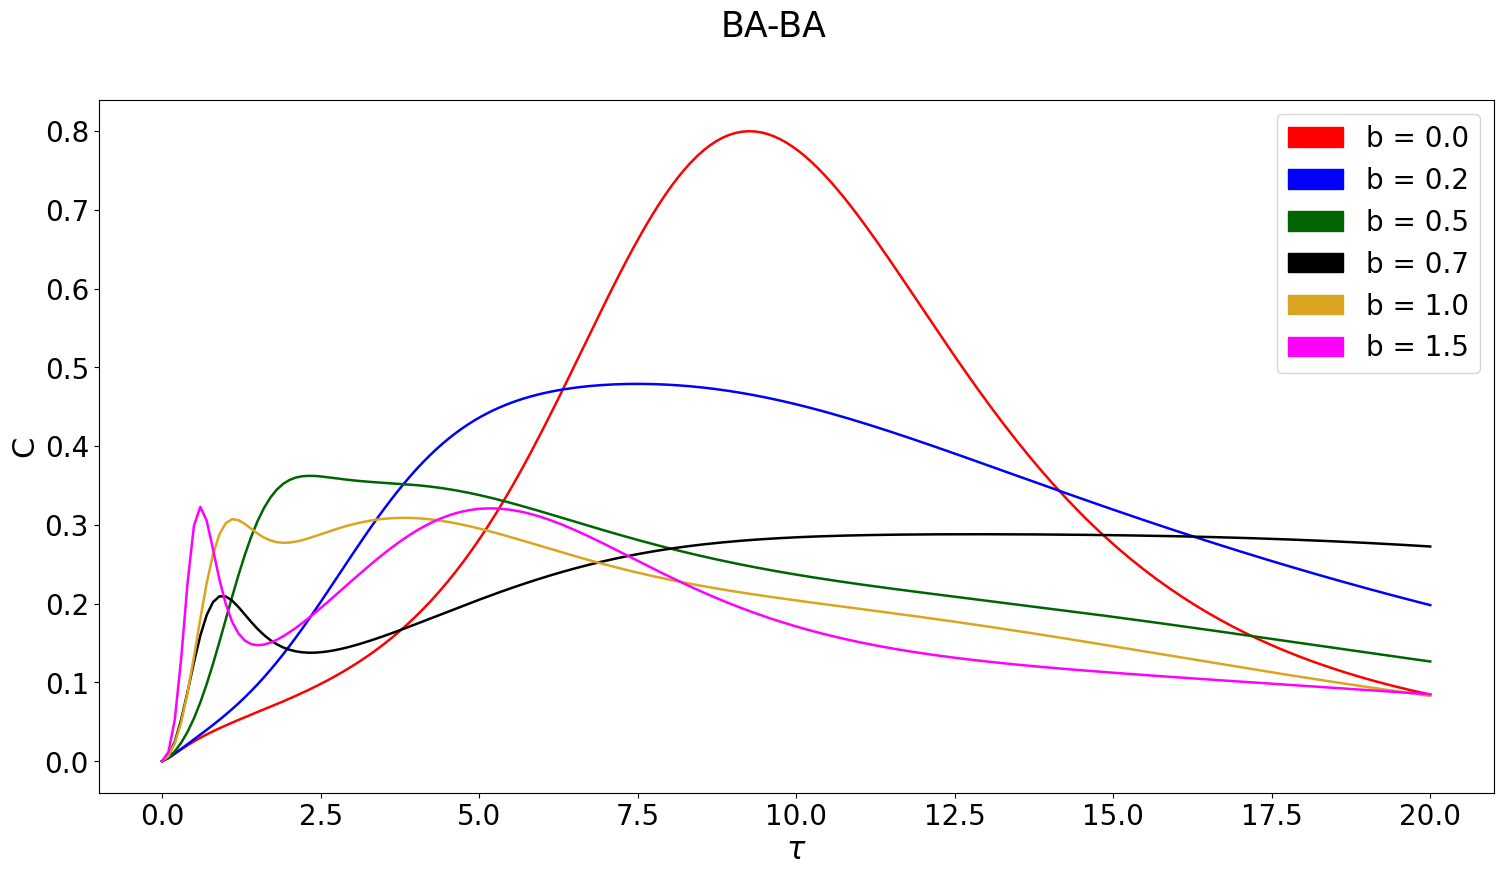

In [415]:
#plot_S(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, S1_4, S2_4, S12_4, c2, f'{title1}-{title2}', 'c2')
#plot_S_n(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_6, S2_6, S12_6, S1_4, S2_4, S12_4, coupling_ext, f'{title1}-{title2}', 'b', 'symlog')
#plot_S_n(taur_s4, taur_s5, taur_s6, taur_s4, S1_4, S2_4, S12_4, S1_5, S2_5, S12_5, S1_6, S2_6, S12_6, S1_4, S2_4, S12_4, coupling_ext, f'{title1}-{title2}', 'b', 'symlog')
plot_C_n(taur_c1, taur_c2, taur_c3, taur_c4, taur_c5, taur_c6, C1_1, C2_1, C12_1, C1_2, C2_2, C12_2, C1_3, C2_3, C12_3, C1_4, C2_4, C12_4,
         C1_5, C2_5, C12_5, C1_6, C2_6, C12_6, coupling_ext, f'{title1}-{title2}', 'b')
#plot_S_n_inset(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_6, S2_6, S12_6, S1_4, S2_4, S12_4, coupling_ext, f'{title1}-{title2}', 'b', 'symlog',
#               ord2_1, ord2_2, ord2_4, ord2_6, dt, t_max, None, 'b', coupling_ext)

In [2]:
# Mixed
max1 = [3.7, 5.1, 2.0, 5.8, 1.2, 5.6]# punto di domanda?
max2 = [4.14, 4.75, 1.61, 2.22, 1.01, 1.01]
max3 = [4.42, 4.87, 2.61, 5.13, 1.41, 4.87]
max4 = [5.11, 4.39, 5.65, 1.38, 4.57, 13.17] # nell'ultimo non c'è proprio un picco
max5 = [4.52, 7.64, 2.41, 6.13, 1.31, 5.13] # 4 e 5 sus

M1 = []
M1.append(max1);M1.append(max2);M1.append(max3);M1.append(max4);M1.append(max5);
M1 = np.array(M1)

#ER
max1 = [3.53, 4.33, 5.24, 6.25, 4.94, 5.34]
max2 = [4.53, 7.66, 8.26, 6.55, 4.84, 4.23] # il terzo un po' sus, il primo massimo è attorno a 2
max3 = [4.13, 4.94, 2.52, 5.14, 4.13, 4.13]
max4 = [4.03, 8.17, 3.33, 5.34, 3.93, 4.24]
max5 = [4.04, 4.55, 2.22, 4.75, 1.31, 4.55]

M2 = []
M2.append(max1);M2.append(max2);M2.append(max3);M2.append(max4);M2.append(max5);
M2 = np.array(M2)

#BA
max1 = [5.34, 5.24, 6.35, 1.01, 1.01, 0.60] # il terzo un po' sus, il primo massimo è attorno a 2
max2 = [8.16, 5.44, 1.91, 7.05, 1.01, 0.60] # nel secondo il primo massimo è attorno ad 1
max3 = [7.15, 9.17, 2.01, 4.63, 8.56, 9.67] # a parte i primi 2 il resto è sus
max4 = [9.46, 5.13, 6.04, 8.26, 1.11, 6.85] # 3, 4 e 5 sus
max5 = [9.25, 7.54, 2.31, 1.01, 3.82, 0.60] # 3, 4 e 5 sus

M3 = []
M3.append(max1);M3.append(max2);M3.append(max3);M3.append(max4);M3.append(max5);
M3 = np.array(M3)

In [3]:
print(M1)
print(np.mean(M1, axis=0))
print(np.std(M1, axis=0))

print(M2)
print(np.mean(M2, axis=0))
print(np.std(M2, axis=0))

print(M3)
print(np.mean(M3, axis=0))
print(np.std(M3, axis=0))

[[ 3.7   5.1   2.    5.8   1.2   5.6 ]
 [ 4.14  4.75  1.61  2.22  1.01  1.01]
 [ 4.42  4.87  2.61  5.13  1.41  4.87]
 [ 5.11  4.39  5.65  1.38  4.57 13.17]
 [ 4.52  7.64  2.41  6.13  1.31  5.13]]
[4.378 5.35  2.856 4.132 1.9   5.956]
[0.46348247 1.16778423 1.4388273  1.94933219 1.34158116 3.96214891]
[[3.53 4.33 5.24 6.25 4.94 5.34]
 [4.53 7.66 8.26 6.55 4.84 4.23]
 [4.13 4.94 2.52 5.14 4.13 4.13]
 [4.03 8.17 3.33 5.34 3.93 4.24]
 [4.04 4.55 2.22 4.75 1.31 4.55]]
[4.052 5.93  4.314 5.606 3.83  4.498]
[0.31864714 1.64042677 2.2360644  0.68213195 1.31928769 0.44395495]
[[5.34 5.24 6.35 1.01 1.01 0.6 ]
 [8.16 5.44 1.91 7.05 1.01 0.6 ]
 [7.15 9.17 2.01 4.63 8.56 9.67]
 [9.46 5.13 6.04 8.26 1.11 6.85]
 [9.25 7.54 2.31 1.01 3.82 0.6 ]]
[7.872 6.504 3.724 4.392 3.102 3.664]
[1.51234123 1.5999075  2.02422924 2.99862902 2.93347166 3.85712121]
